In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# Load the dataset
data = pd.read_csv('my_data.csv')  # replace with your file path if needed

# Split into features (X) and label (y)
X = data.drop(columns=['Label'])
y = data['Label']

# Handle categorical features
X = pd.get_dummies(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Define the hybrid model
hybrid_model = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb)],
    voting='soft'
)

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Predict on test datapytcle
y_pred = hybrid_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2848
           1       1.00      1.00      1.00       416

    accuracy                           1.00      3264
   macro avg       1.00      1.00      1.00      3264
weighted avg       1.00      1.00      1.00      3264



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print on console
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Save the results in 'output/model_evaluation.txt'
import os

# Create output folder if it doesn't exist
os.makedirs('Results', exist_ok=True)

# Save results
with open('Results/model_evaluation.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy:.4f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2848
           1       1.00      1.00      1.00       416

    accuracy                           1.00      3264
   macro avg       1.00      1.00      1.00      3264
weighted avg       1.00      1.00      1.00      3264



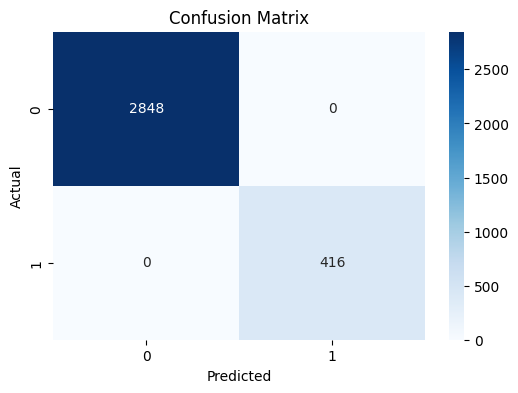

In [ ]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


# Plot and save
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the figure
plt.savefig('Results/confusion_matrix.png')  # Save as PNG
# plt.close()  # Close the plot so it doesn't display immediately
plt.show()

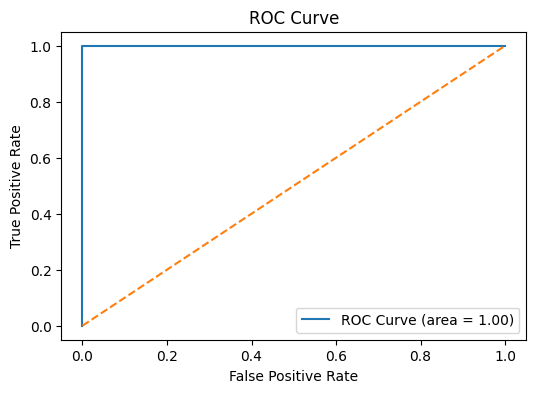

In [4]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

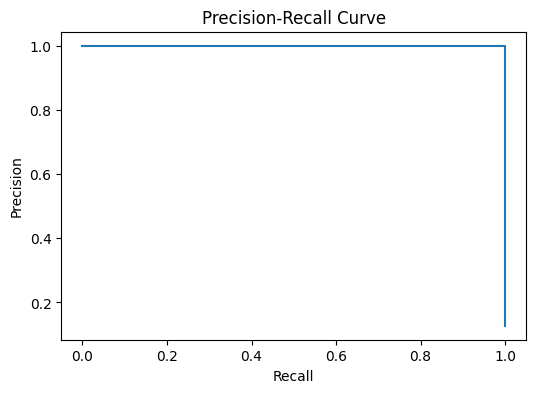

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)



# Plot and save
plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Save the figure
plt.savefig('Results/precision_recall_curve.png')  # Save the plot
# plt.close()  # Close the figure
plt.show()
